Previously, we studied variation in number of divvy trips according to user charcteristics and time/season.

But we may wonder: does the number of divvy stations also help/limit the number of trips? 

After all, if people do not even have access to divvy bikes, how can they become a user?

In this notebook, we study the relationship between the number of trips and number of divvy stations. 

## Divvy Trips & Divvy Station

In [110]:
import requests, json
import pandas as pd
import datetime as dt
import matplotlib as plt
import geopandas as gpd
from shapely.geometry import Point


%matplotlib inline

In [111]:
station = pd.read_csv("Divvy_Bicycle_Stations_-_All_-_Map.csv")

In [112]:
station.head()

,ID,Station Name,Address,Total Docks,Docks in Service,Status,Latitude,Longitude,Location
0,14,Morgan St & 18th St,962 W. 18th St,15,15,In Service,41.858086,-87.651073,"(41.858086, -87.651073)"
1,73,Jefferson St & Monroe St,207 S Jefferson St,19,19,In Service,41.880422,-87.642746,"(41.880422, -87.642746)"
2,622,California Ave & Cortez St,California Ave & Cortez St,15,15,In Service,41.900363,-87.696704,"(41.900363, -87.696704)"
3,59,Wabash Ave & Roosevelt Rd,1210 S Wabash Ave,23,23,In Service,41.867227,-87.625961,"(41.867227, -87.625961)"
4,6,Dusable Harbor,Dusable Harbor,39,38,In Service,41.885041,-87.612794,"(41.885041, -87.612794)"


The station data includes station ID, station name & address longitude and lattitude, the number of divvy bikes on dock. If we combine this dataset with the trip data, we can get account of how many trips are started/ended from a specific station, which station gets used the most often. 

Now lets do it

In [113]:
trips_2017_q1= pd.read_csv('/Users/shuhan_zhou/Documents/GitHub/divvy_new/Divvy_Trips_2017_Q1Q2/Divvy_Trips_2017_Q1.csv')
trips_2017_q2= pd.read_csv('/Users/shuhan_zhou/Documents/GitHub/divvy_new/Divvy_Trips_2017_Q1Q2/Divvy_Trips_2017_Q2.csv')

trips_2017 = trips_2017_q1.append(trips_2017_q2)

### Stations where Trips Got Started

we attemp the merge using station ID as the index to merge on


In [114]:
trips_2017['from_station_id'] = pd.to_numeric(trips_2017['from_station_id'], errors='coerce')

trips_2017_start = trips_2017.set_index('from_station_id')
trips_2017_start.index.names = ['ID']

In [115]:
trips_2017_start

,trip_id,start_time,end_time,bikeid,tripduration,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
ID,,,,,,,,,,,
66,13518905,3/31/2017 23:59:07,4/1/2017 00:13:24,5292,857,Clinton St & Lake St,171,May St & Cullerton St,Subscriber,Male,1989.0
199,13518904,3/31/2017 23:56:25,4/1/2017 00:00:21,4408,236,Wabash Ave & Grand Ave,26,McClurg Ct & Illinois St,Subscriber,Male,1990.0
520,13518903,3/31/2017 23:55:33,4/1/2017 00:01:21,696,348,Greenview Ave & Jarvis Ave,432,Clark St & Lunt Ave,Subscriber,Female,1979.0
110,13518902,3/31/2017 23:54:46,3/31/2017 23:59:34,4915,288,Dearborn St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1985.0
327,13518901,3/31/2017 23:53:33,4/1/2017 00:00:28,4247,415,Sheffield Ave & Webster Ave,331,Halsted St & Blackhawk St (*),Subscriber,Female,1989.0
143,13518900,3/31/2017 23:51:17,3/31/2017 23:55:19,3536,242,Sedgwick St & Webster Ave,289,Wells St & Concord Ln,Subscriber,Male,1988.0
81,13518899,3/31/2017 23:51:16,3/31/2017 23:57:17,5111,361,Daley Center Plaza,41,Federal St & Polk St,Subscriber,Male,1987.0
56,13518898,3/31/2017 23:50:26,3/31/2017 23:56:20,1579,354,Desplaines St & Kinzie St,77,Clinton St & Madison St,Subscriber,Male,1981.0
210,13518897,3/31/2017 23:50:25,3/31/2017 23:55:24,3914,299,Ashland Ave & Division St,69,Damen Ave & Pierce Ave,Subscriber,Male,1992.0


In [116]:
trip_station_start = pd.merge(station, trips_2017_start, right_index=True, left_index=True)

In [117]:
trip_station_start

,ID,Station Name,Address,Total Docks,Docks in Service,Status,Latitude,Longitude,Location,trip_id,start_time,end_time,bikeid,tripduration,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
2,622,California Ave & Cortez St,California Ave & Cortez St,15,15,In Service,41.900363,-87.696704,"(41.900363, -87.696704)",13518843,3/31/2017 22:52:02,3/31/2017 23:07:14,5453,912,Buckingham Fountain,39,Wabash Ave & Adams St,Customer,NaN,NaN
2,622,California Ave & Cortez St,California Ave & Cortez St,15,15,In Service,41.900363,-87.696704,"(41.900363, -87.696704)",13518841,3/31/2017 22:51:56,3/31/2017 23:07:14,1752,918,Buckingham Fountain,39,Wabash Ave & Adams St,Customer,NaN,NaN
2,622,California Ave & Cortez St,California Ave & Cortez St,15,15,In Service,41.900363,-87.696704,"(41.900363, -87.696704)",13518840,3/31/2017 22:51:49,3/31/2017 23:07:18,5003,929,Buckingham Fountain,39,Wabash Ave & Adams St,Customer,NaN,NaN
2,622,California Ave & Cortez St,California Ave & Cortez St,15,15,In Service,41.900363,-87.696704,"(41.900363, -87.696704)",13518839,3/31/2017 22:51:39,3/31/2017 23:07:35,1848,956,Buckingham Fountain,39,Wabash Ave & Adams St,Customer,NaN,NaN
2,622,California Ave & Cortez St,California Ave & Cortez St,15,15,In Service,41.900363,-87.696704,"(41.900363, -87.696704)",13518771,3/31/2017 22:02:23,3/31/2017 22:37:31,5453,2108,Buckingham Fountain,2,Buckingham Fountain,Customer,NaN,NaN
2,622,California Ave & Cortez St,California Ave & Cortez St,15,15,In Service,41.900363,-87.696704,"(41.900363, -87.696704)",13518768,3/31/2017 22:01:25,3/31/2017 22:37:31,5003,2166,Buckingham Fountain,2,Buckingham Fountain,Customer,NaN,NaN
2,622,California Ave & Cortez St,California Ave & Cortez St,15,15,In Service,41.900363,-87.696704,"(41.900363, -87.696704)",13518533,3/31/2017 20:21:14,3/31/2017 20:41:20,1566,1206,Buckingham Fountain,76,Lake Shore Dr & Monroe St,Customer,NaN,NaN
2,622,California Ave & Cortez St,California Ave & Cortez St,15,15,In Service,41.900363,-87.696704,"(41.900363, -87.696704)",13518532,3/31/2017 20:21:02,3/31/2017 20:41:34,1916,1232,Buckingham Fountain,76,Lake Shore Dr & Monroe St,Customer,NaN,NaN
2,622,California Ave & Cortez St,California Ave & Cortez St,15,15,In Service,41.900363,-87.696704,"(41.900363, -87.696704)",13513911,3/31/2017 08:49:07,3/31/2017 08:55:41,99,394,Buckingham Fountain,90,Millennium Park,Subscriber,Female,1975.0
2,622,California Ave & Cortez St,California Ave & Cortez St,15,15,In Service,41.900363,-87.696704,"(41.900363, -87.696704)",13513176,3/31/2017 07:38:06,3/31/2017 07:47:25,2496,559,Buckingham Fountain,287,Franklin St & Monroe St,Subscriber,Male,1969.0


However, we notice there is a significant issue we forget: the station ID from the trip data and from the station data may not be matchable, which is to say the same ID can totally represent different stations since the data source is different!

For example, station ID 622, represents station at California Ave and Cortez St in the station dataset. 

But it refers to the station at Buckingham Foundation in the trip dataset!

These two locations are completely different and very far from each other!!!

Therefore now we try the second best approach: using trips data alone to compute the trips taken from each station and only use the geographic information from the station data for the mapping

In [118]:
start = trips_2017['from_station_name'].value_counts().reset_index()
start.columns = ['from_station_name', 'start_count']

In [119]:
start.head()

,from_station_name,start_count
0,Streeter Dr & Grand Ave,36686
1,Clinton St & Washington Blvd,22429
2,Lake Shore Dr & Monroe St,21822
3,Clinton St & Madison St,19098
4,Canal St & Adams St,18105


The most popular stations to start trips with: 

Streeter Dr & Grand Ave                36686;

Clinton St & Washington Blvd           22429;

Lake Shore Dr & Monroe St              21822;

Clinton St & Madison St                19098;

Canal St & Adams St                    18105


What if we want to know whether a lot of trip END at these stations too ?

We repeat the same exercise for trip ending stations

In [120]:
end = trips_2017['to_station_name'].value_counts().reset_index()
end.columns = ['to_station_name', 'end_count']

In [121]:
end.head()

,to_station_name,end_count
0,Streeter Dr & Grand Ave,39537
1,Clinton St & Washington Blvd,21113
2,Clinton St & Madison St,20969
3,Lake Shore Dr & Monroe St,20652
4,Lake Shore Dr & North Blvd,19734


Four of the top ending trip locations are included in the top starting trip locations! 

So is there a statistical relationship between number of bikes on doc and number of start trips and end trips? 

In [122]:
station = pd.read_csv("Divvy_Bicycle_Stations_-_All_-_Map.csv").set_index('Station Name')
station.dropna(inplace = True)

In [123]:
start = start.set_index('from_station_name')
end = end.set_index('to_station_name')
join = start.join(end)

In [124]:
join.head()

,start_count,end_count
from_station_name,,
Streeter Dr & Grand Ave,36686,39537.0
Clinton St & Washington Blvd,22429,21113.0
Lake Shore Dr & Monroe St,21822,20652.0
Clinton St & Madison St,19098,20969.0
Canal St & Adams St,18105,17351.0


In [125]:
join_station = station.join(join)
join_station.head()

,ID,Address,Total Docks,Docks in Service,Status,Latitude,Longitude,Location,start_count,end_count
Station Name,,,,,,,,,,
Morgan St & 18th St,14,962 W. 18th St,15,15,In Service,41.858086,-87.651073,"(41.858086, -87.651073)",1548.0,1668.0
Jefferson St & Monroe St,73,207 S Jefferson St,19,19,In Service,41.880422,-87.642746,"(41.880422, -87.642746)",4464.0,4079.0
California Ave & Cortez St,622,California Ave & Cortez St,15,15,In Service,41.900363,-87.696704,"(41.900363, -87.696704)",582.0,615.0
Wabash Ave & Roosevelt Rd,59,1210 S Wabash Ave,23,23,In Service,41.867227,-87.625961,"(41.867227, -87.625961)",9243.0,9858.0
Dusable Harbor,6,Dusable Harbor,39,38,In Service,41.885041,-87.612794,"(41.885041, -87.612794)",9171.0,7942.0


In [126]:
from scipy import stats
from statsmodels import api as sm
import statsmodels.formula.api as smf
import statsmodels.regression.mixed_linear_model as sm_mlm

from time import sleep

Is divvy bike's manager a smart manager? is he putting more bikes to places where there is high demand?

we test this using a simple ols model using both trips starting from and ended in that station to represent demand

In [127]:
ols_1 = smf.ols(formula = "N ~ s + e ",
              data = join_station.rename(columns = {"Total Docks" : "N", 
                                          "start_count"  : "s",
                                         "end_count": "e"}))
model_1 = ols_1.fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      N   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     378.5
Date:                Fri, 01 Dec 2017   Prob (F-statistic):          2.52e-105
Time:                        16:46:21   Log-Likelihood:                -1653.2
No. Observations:                 573   AIC:                             3312.
Df Residuals:                     570   BIC:                             3325.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8918      0.225     61.716      0.000      13.450      14.334
s              0.0041      0.000      8.543      0.000       0.003       0.005
e             -0.0027      0.000     -5.749      0.000      -0.004      -0.002
==============================================================================
Omnibus:                      253.842   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2049.472
Skew:                           1.760   Prob(JB):                         0.00
Kurtosis:                      11.571   Cond. No.                     7.92e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

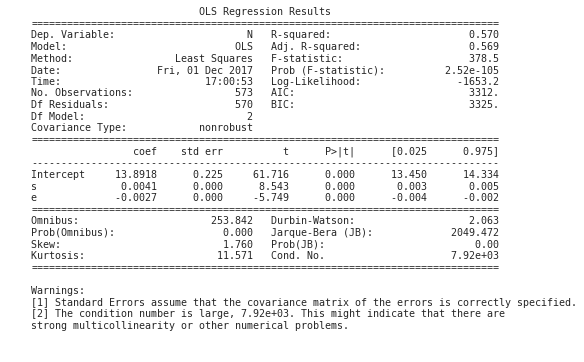

In [134]:
# the following code is simply for storing the output in image file
import matplotlib.pyplot as plt
plt.text(0.01, 0.05, str(model_1.summary()), {'fontsize': 15}, fontproperties = 'monospace') 
plt.axis('off')

#fig = plt.figure(figsize=(9, 11))
plt.savefig('trip_station_ols.png', bbox_inches = 'tight')

The results look very good to me! When 1000 more trips are started from a station, they put one more bike in supply. wHEN 1000 more trips are ended there, put 2 fewer bikes there. 

Conversely, is user behavior responding to divvy's investment?

We answer this question by ploting the relationship between number of trip start with total docks in service at each station

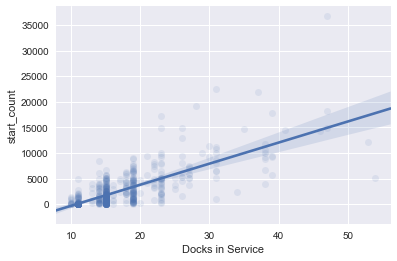

In [132]:
ax = sns.regplot(x = "Docks in Service", y = "start_count", data = join_station, scatter_kws = {"alpha" : 0.1})

fig = ax.get_figure()
fig.savefig("trip_dock_in_service.png")

it does not really make sense to plot number of trips ending at station with number of bikes at that station. 

because when people end their trips, they either get to their destination or get tired from riding bike. 

I would imagine very few people are being altruistic in the sense that they return their bikes so that other people can use. 

Hence, we will skip ploting number of trips ended with number of bikes